# Prediction System for Adult Census Income

* The prediction task is to determine whether a person makes over $50K a year.
* Using Decision Tree algorithm for implementing the Prediction


- ### About Me
    - #### By Mohamed Saeed Ali bin Omar | Computer Science
    - #### GitHub: https://github.com/MohamedSaeed-dev

### Import the required libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder          
from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report

## Read the Adults datasets

In [2]:
data = pd.read_csv('./adult.csv')
display(data)
print(data.shape)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


(32561, 15)


### Data Preprocessing
- #### Data Cleaning
    - ##### Null values
        - Let's Check if the columns have null values

In [3]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1842
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

- As we see, workclass, occupation and native.country has null values that can effect the data negatively
    - we must drop them

In [4]:
# Drop columns with too many missing values
data.drop(columns=["workclass", "occupation", "native.country"], axis=1, inplace=True)
# Remove any row conatins any null values
data.dropna(inplace=True)

- Let's check again

In [5]:
data.isnull().sum()

age               0
fnlwgt            0
education         0
education.num     0
marital.status    0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
income            0
dtype: int64

## Inspect the data

In [6]:
data.head(20)

,age,fnlwgt,education,education.num,marital.status,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,77053,HS-grad,9,Widowed,Not-in-family,White,Female,0,4356,40,<=50K
1,82,132870,HS-grad,9,Widowed,Not-in-family,White,Female,0,4356,18,<=50K
2,66,186061,Some-college,10,Widowed,Unmarried,Black,Female,0,4356,40,<=50K
3,54,140359,7th-8th,4,Divorced,Unmarried,White,Female,0,3900,40,<=50K
4,41,264663,Some-college,10,Separated,Own-child,White,Female,0,3900,40,<=50K
5,34,216864,HS-grad,9,Divorced,Unmarried,White,Female,0,3770,45,<=50K
6,38,150601,10th,6,Separated,Unmarried,White,Male,0,3770,40,<=50K
7,74,88638,Doctorate,16,Never-married,Other-relative,White,Female,0,3683,20,>50K
8,68,422013,HS-grad,9,Divorced,Not-in-family,White,Female,0,3683,40,<=50K
9,41,70037,Some-college,10,Never-married,Unmarried,White,Male,0,3004,60,>50K


### Checking the confused column (capital.gain) has unique values or not

In [7]:
data["capital.gain"].unique()

array([    0, 99999, 41310, 34095, 27828, 25236, 25124, 22040, 20051,
       18481, 15831, 15024, 15020, 14344, 14084, 13550, 11678, 10605,
       10566, 10520,  9562,  9386,  8614,  7978,  7896,  7688,  7443,
        7430,  7298,  6849,  6767,  6723,  6514,  6497,  6418,  6360,
        6097,  5721,  5556,  5455,  5178,  5060,  5013,  4934,  4931,
        4865,  4787,  4687,  4650,  4508,  4416,  4386,  4101,  4064,
        3942,  3908,  3887,  3818,  3781,  3674,  3471,  3464,  3456,
        3432,  3418,  3411,  3325,  3273,  3137,  3103,  2993,  2977,
        2964,  2961,  2936,  2907,  2885,  2829,  2653,  2635,  2597,
        2580,  2538,  2463,  2414,  2407,  2387,  2354,  2346,  2329,
        2290,  2228,  2202,  2176,  2174,  2105,  2062,  2050,  2036,
        2009,  1848,  1831,  1797,  1639,  1506,  1471,  1455,  1424,
        1409,  1173,  1151,  1111,  1086,  1055,   991,   914,   594,
         401,   114], dtype=int64)

- #### Outlier values
- Let's check the values of income column 

In [8]:
income = set(data["income"])
print(f"income : {income} ")

income : {'>50K', '<=50K'} 


## Implement Classification

#### Decide variables to use in each X, Y

- We need to use the dataset for X, except the income column
- and we use the income column for Y

In [9]:
X = data.drop(columns=["income"], axis=1)
y = data['income']

### Transfrom attribute
- transform the X and Y data to numeric values

In [10]:
le = LabelEncoder()
X = X.apply(le.fit_transform)
y = le.fit_transform(y)
display(X)
display(y)

,age,fnlwgt,education,education.num,marital.status,relationship,race,sex,capital.gain,capital.loss,hours.per.week
0,72,2649,11,8,6,1,4,0,0,91,39
1,65,6514,11,8,6,1,4,0,0,91,17
2,49,11175,15,9,6,4,2,0,0,91,39
3,37,7009,5,3,0,4,4,0,0,90,39
4,24,16850,15,9,5,3,4,0,0,90,39
...,...,...,...,...,...,...,...,...,...,...,...
32556,5,18560,15,9,4,1,4,1,0,0,39
32557,10,16528,7,11,2,5,4,0,0,0,37
32558,23,8080,11,8,2,0,4,1,0,0,39
32559,41,7883,11,8,6,4,4,0,0,0,39


array([0, 0, 0, ..., 1, 0, 0])

### Spliting the dataset
- Split the X data into X train and X test (80%)
- Split the Y data into y train and y test (20%)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=65)

### Implement Decision Tree algorithm
- with initialy only 4 depths
- train the model on X_train and y_train splitted datasets

In [12]:
dt_model = DecisionTreeClassifier(max_depth=4)
dt_model = dt_model.fit(X_train, y_train)

- Predict the trained model on X_test splitted dataset

In [13]:
predictions = dt_model.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

### Evaluation the Model Performance on Testing dataset

- accuracy_score method

In [14]:
print(f"Accuracy Score on Testing set is {accuracy_score(y_test, predictions)}")

Accuracy Score on Testing set is 0.8423153692614771


- precision_score method

In [15]:
print(f"Precision Score on Testing set is {precision_score(y_test, predictions)}")

Precision Score on Testing set is 0.7566793893129771


- recall_score method

In [16]:
print(f"Recall Score on Testing set is {recall_score(y_test, predictions)}")

Recall Score on Testing set is 0.5067092651757189


- confusion_matrix method

In [17]:
confusion_matrix(y_test, predictions, labels=[0,1])

array([[4693,  255],
       [ 772,  793]], dtype=int64)

- classification_report method

In [18]:
print(classification_report(y_test, predictions, target_names=['<=50K', '>50K']))

              precision    recall  f1-score   support

       <=50K       0.86      0.95      0.90      4948
        >50K       0.76      0.51      0.61      1565

    accuracy                           0.84      6513
   macro avg       0.81      0.73      0.75      6513
weighted avg       0.83      0.84      0.83      6513



### Finding the features (Columns) Importance

In [19]:
feature_names = X.columns
feature_names

Index(['age', 'fnlwgt', 'education', 'education.num', 'marital.status',
       'relationship', 'race', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

In [20]:
feature_importance = pd.DataFrame(dt_model.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
relationship,0.490724
capital.gain,0.247069
education.num,0.245396
hours.per.week,0.013880
age,0.002196
marital.status,0.000420
fnlwgt,0.000314
education,0.000000
race,0.000000
sex,0.000000


As we see, here are the features that are important in descending order
- relationship is more important
- while capital.loss, sex, race and education are less important

#### Choosing the features that are important > 0

In [21]:
features = list(feature_importance[feature_importance[0]>0].index)
features

['relationship',
 'capital.gain',
 'education.num',
 'hours.per.week',
 'age',
 'marital.status',
 'fnlwgt']

#### Show the features importance in a Chart bar

<Axes: >

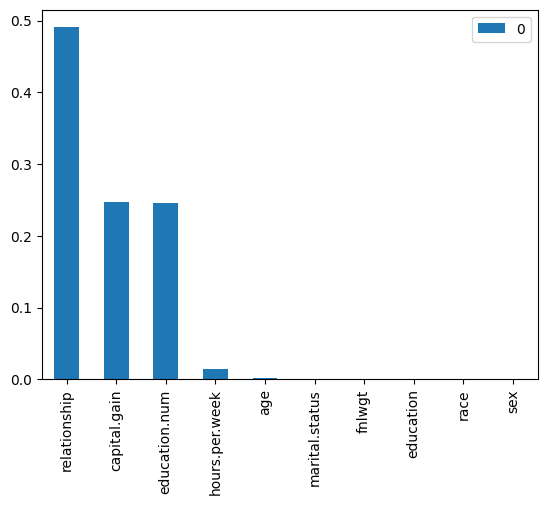

In [22]:
feature_importance.head(10).plot(kind='bar')

## Show the Decision Tree

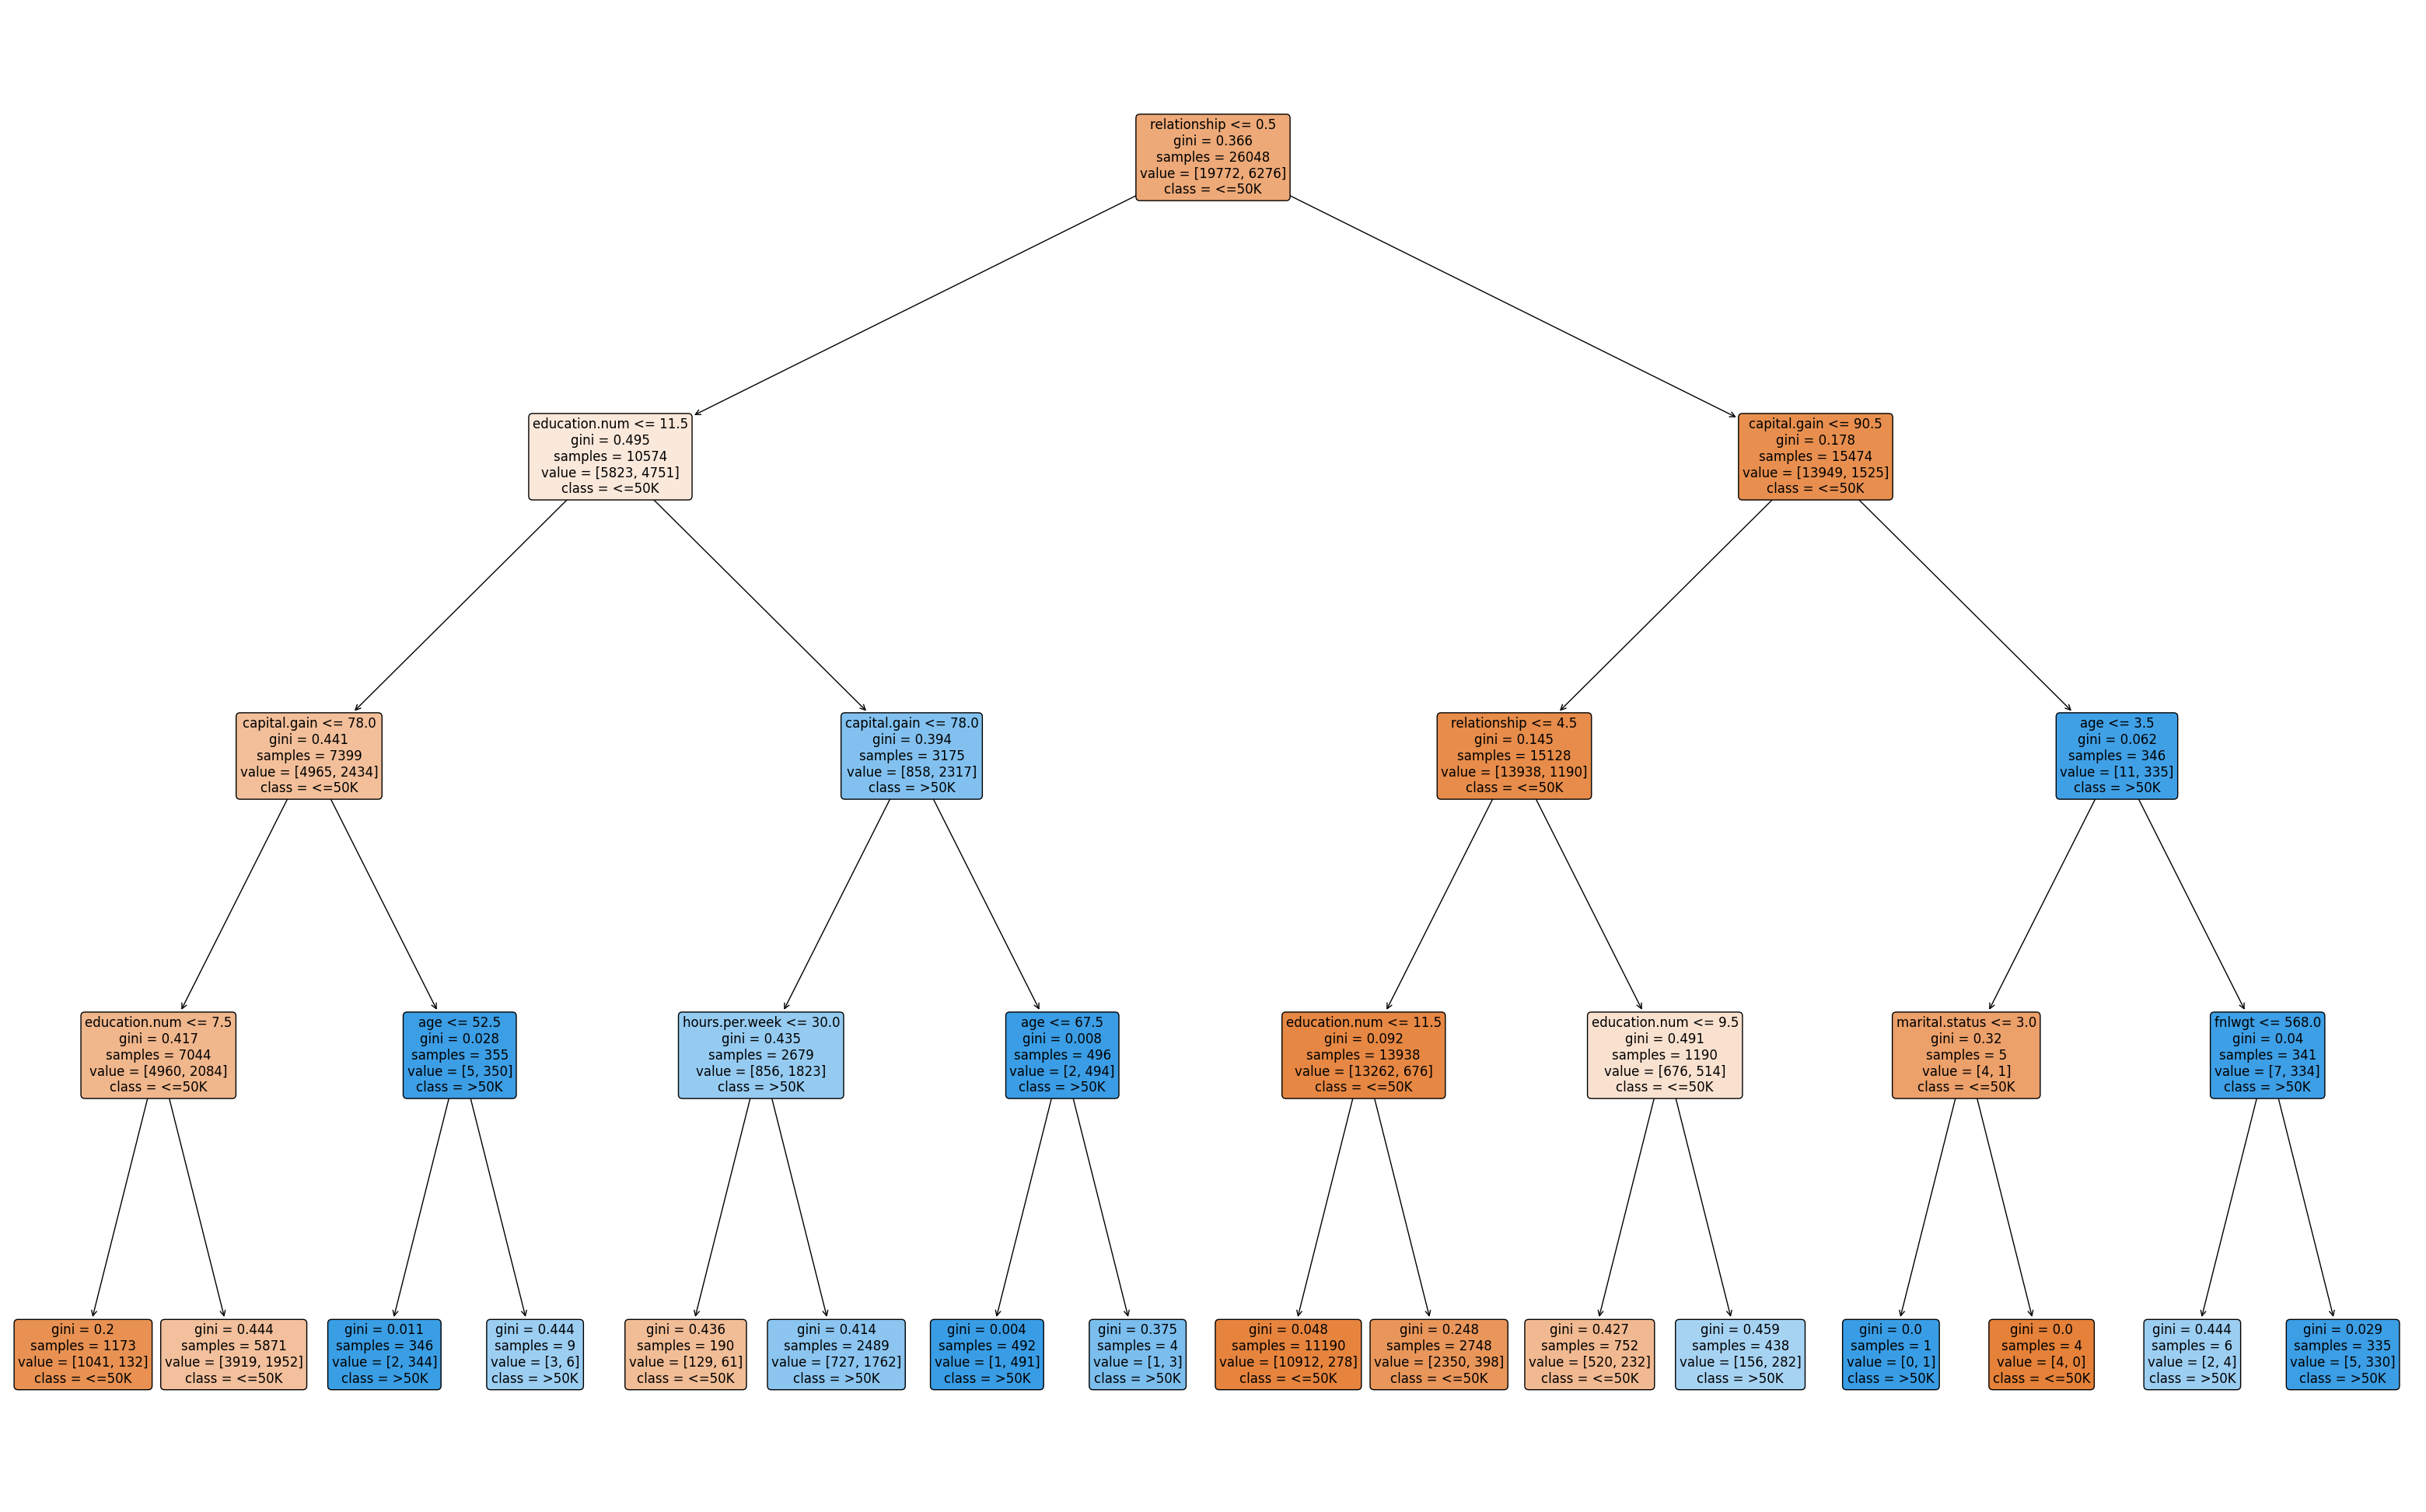

In [23]:
fig = plt.figure(figsize=(40,25))
tree_plot = tree.plot_tree(
    dt_model, 
    feature_names=feature_names,  
    class_names=['<=50K', '>50K'],
    fontsize=12,
    filled=True,
    rounded=True,
    )